In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import pickle
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
crop = pd.read_csv("Crop_recommendation.csv")

In [3]:

my_dict = {
    "execution_count": None
}

print(my_dict)



{'execution_count': None}


In [4]:
columns = ['temperature', 'humidity', 'ph', 'rainfall', 'label', 'column_6', 'column_7']
df = pd.DataFrame(crop, columns=columns)

In [5]:
print(df.isnull().sum())

temperature       0
humidity          0
ph                0
rainfall          0
label             0
column_6       2200
column_7       2200
dtype: int64


In [6]:
X = df[['temperature', 'humidity', 'ph', 'rainfall']]
y = df['label']

In [7]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
print("X_train_scaled shape:", X_train_scaled.shape)
print("y_train shape:", y_train.shape)


X_train_scaled shape: (1760, 4)
y_train shape: (1760,)


In [11]:
decision_tree = DecisionTreeClassifier(random_state=42,max_depth=5)
print("Training Decision Tree model...")
decision_tree.fit(X_train_scaled, y_train)


Training Decision Tree model...


DecisionTreeClassifier(max_depth=5, random_state=42)

In [12]:
dt_model_path = 'decision_tree_model.pkl'
with open(dt_model_path, 'wb') as dt_file:
    pickle.dump(decision_tree, dt_file)
print(f"Decision Tree model trained and saved to {dt_model_path}")

Decision Tree model trained and saved to decision_tree_model.pkl


In [13]:
with open(dt_model_path, 'rb') as dt_file:
    loaded_dt_model = pickle.load(dt_file)



In [14]:
random_forest = RandomForestClassifier(n_estimators=100,random_state=42)
print("Training Random Forest model...")
random_forest.fit(X_train_scaled, y_train)
print(random_forest)

Training Random Forest model...


RandomForestClassifier(random_state=42)


In [15]:
rf_model_path = 'random_forest_model.pkl'
with open(rf_model_path, 'wb') as rf_file:
    pickle.dump(random_forest, rf_file)
print(f"Random Forest model trained and saved to {rf_model_path}")


Random Forest model trained and saved to random_forest_model.pkl


In [16]:
with open(rf_model_path, 'rb') as rf_file:
    loaded_rf_model = pickle.load(rf_file)


In [17]:
if hasattr(loaded_dt_model, 'predict'):
    dt_predictions = loaded_dt_model.predict(X_test_scaled)
else:
    print("Decision Tree model is not fitted yet")

if hasattr(loaded_rf_model, 'predict'):
    rf_predictions = loaded_rf_model.predict(X_test_scaled)
else:
    print("Random Forest model is not fitted yet")

print("Decision Tree Predictions:", dt_predictions)
print("Random Forest Predictions:", rf_predictions)

Decision Tree Predictions: ['muskmelon' 'watermelon' 'orange' 'orange' 'orange' 'mango' 'orange'
 'lentil' 'mungbean' 'lentil' 'blackgram' 'coconut' 'orange' 'rice'
 'coconut' 'orange' 'orange' 'blackgram' 'coconut' 'muskmelon' 'coffee'
 'orange' 'orange' 'coconut' 'chickpea' 'rice' 'watermelon' 'orange'
 'coffee' 'rice' 'orange' 'lentil' 'coffee' 'lentil' 'coffee' 'blackgram'
 'coconut' 'chickpea' 'chickpea' 'kidneybeans' 'coconut' 'mango'
 'blackgram' 'blackgram' 'mungbean' 'mango' 'coffee' 'coconut' 'muskmelon'
 'blackgram' 'blackgram' 'coffee' 'grapes' 'mungbean' 'coffee'
 'kidneybeans' 'grapes' 'orange' 'grapes' 'blackgram' 'watermelon'
 'coconut' 'lentil' 'orange' 'papaya' 'mango' 'orange' 'rice' 'muskmelon'
 'coffee' 'muskmelon' 'coconut' 'rice' 'grapes' 'blackgram' 'coconut'
 'grapes' 'grapes' 'watermelon' 'orange' 'coffee' 'chickpea' 'rice'
 'blackgram' 'orange' 'mango' 'coffee' 'lentil' 'blackgram' 'orange'
 'mango' 'blackgram' 'grapes' 'coconut' 'coffee' 'blackgram' 'kidneyb

In [18]:
dt_accuracy = accuracy_score(y_test, dt_predictions)
rf_accuracy = accuracy_score(y_test, rf_predictions)

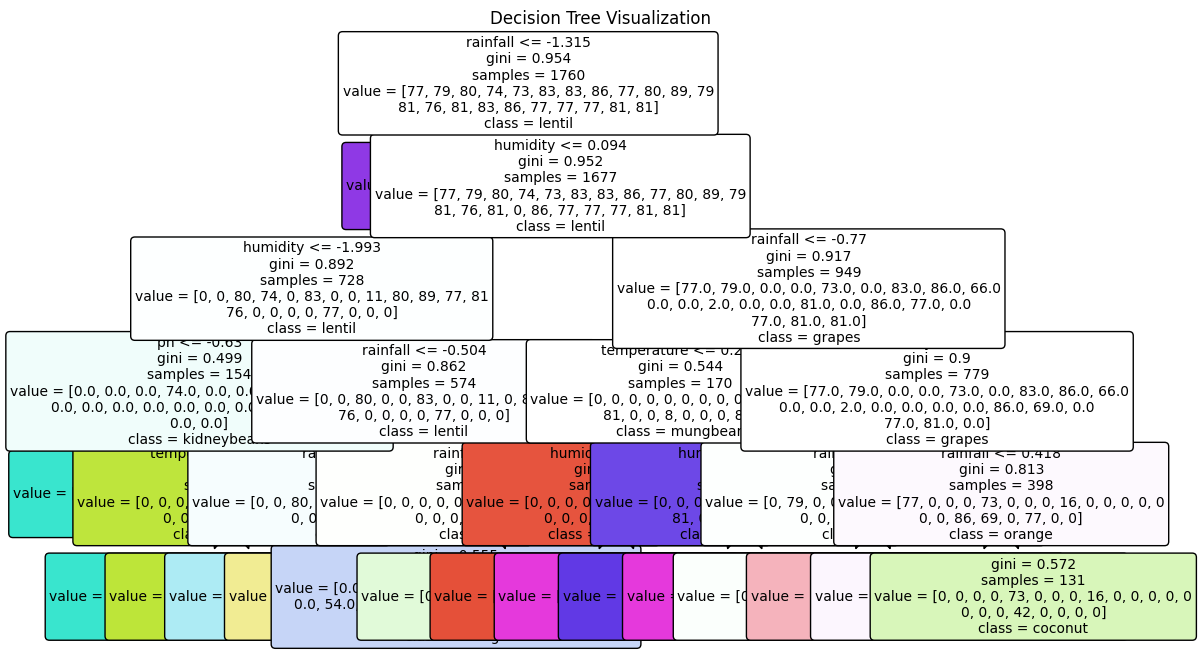

In [19]:
plt.figure(figsize=(12, 8))
plot_tree(decision_tree, filled=True, feature_names=X.columns, class_names=label_encoder.classes_,
          rounded=True, 
          fontsize=10)
plt.title('Decision Tree Visualization')
plt.show()


In [20]:
print(f"Decision Tree Accuracy: {dt_accuracy * 100:.2f}%")
print(f"Random Forest Accuracy: {rf_accuracy * 100:.2f}%")

Decision Tree Accuracy: 55.00%
Random Forest Accuracy: 96.59%
